In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r'/content/drive/MyDrive/Deep Learning/DL Project 1/airline_satisfaction_combined.csv')
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129483,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129484,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129485,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = df.copy()
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
X = data.drop('satisfaction', axis = 1)
y = data['satisfaction']

In [ ]:
X.shape

(129487, 22)

In [ ]:
y.shape

(129487,)

In [ ]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

# Train Test Split

In [ ]:
# Splitting the Data into Train and Test split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, stratify=y_encoded, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((103589, 22), (103589,))

In [ ]:
X_test.shape, y_test.shape

((25898, 22), (25898,))

In [ ]:
y_test.shape, X_test.shape

((25898,), (25898, 22))

# Preprocessing

In [ ]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in cat_cols:
  print(data[col].value_counts())
  print('-'*30)


Gender
Female    65703
Male      63784
Name: count, dtype: int64
------------------------------
Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
------------------------------
Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
------------------------------
Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64
------------------------------


In [ ]:
ratings_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Inflight service', 'Cleanliness']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# splitting num and cat columns

# num cols without rating columns
num_cols = [col for col in X_train.select_dtypes(include = 'number').columns if col not in ratings_cols]
# cat columns
cat_cols = X_train.select_dtypes(include = 'object').columns

# Scaling numerical columns
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),
                              columns = num_cols, index = X_train.index)
x_test_num_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),
                             columns = num_cols, index = X_test.index)

# encoding categorical columns
X_train_cat_encoded = pd.get_dummies(X_train[cat_cols], drop_first = True)
X_test_cat_encoded = pd.get_dummies(X_test[cat_cols], drop_first = True)

# aligning both datasets to ensure columns match
X_train_cat_encoded, X_test_cat_encoded = X_train_cat_encoded.align(X_test_cat_encoded, join = 'left', axis = 1, fill_value = 0)

# ratings columns
X_train_ratings = X_train[ratings_cols]
X_test_ratings = X_test[ratings_cols]

# Final concatenation: Scaled numerical columns + unscaled ratings columns + encoded categorical columns
X_train_final = pd.concat([X_train_num_scaled, X_train_ratings, X_train_cat_encoded], axis = 1)
X_test_final = pd.concat([x_test_num_scaled, X_test_ratings, X_test_cat_encoded], axis = 1)


In [ ]:
X_train_final

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
48592,-1.087401,-0.368053,-0.386093,-0.393387,2,3,3,5,2,3,5,2,3,5,2,5,5,5,True,True,False,True,False
123293,-0.159977,1.067202,-0.386093,-0.080064,3,3,3,3,3,5,5,4,4,4,4,5,4,3,True,False,False,False,False
52701,0.105001,-0.995915,-0.386093,-0.393387,4,4,4,4,5,4,5,5,1,4,5,5,4,5,False,False,False,True,False
18350,-1.286134,-0.199554,-0.386093,-0.393387,2,2,2,3,1,2,1,1,4,3,5,4,5,1,True,True,False,True,False
108503,0.105001,-0.294836,0.036660,0.102707,3,5,3,3,3,4,4,4,4,4,4,5,4,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52926,-1.021156,-0.890602,0.406569,-0.341166,5,0,5,3,4,5,4,4,2,2,3,4,4,4,False,True,False,True,False
90338,-1.219890,-1.014971,-0.386093,-0.367276,4,5,4,5,4,4,3,4,4,5,4,2,1,4,True,True,False,True,False
87959,-0.822422,-0.645877,-0.386093,-0.393387,4,4,4,3,2,4,1,2,5,3,5,4,4,2,True,True,False,False,False
48781,-0.027488,1.599781,-0.227561,0.076597,3,4,4,4,4,3,4,3,3,3,3,2,3,1,False,False,False,False,False


In [ ]:
X_test_final

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
99927,0.502468,-0.696026,-0.386093,-0.393387,1,4,1,3,2,1,2,2,4,4,4,5,5,2,True,False,True,True,False
9123,-0.822422,-0.068164,0.432991,-0.027844,4,4,4,3,2,4,2,2,3,2,4,2,4,2,True,True,False,False,False
8591,-1.021156,0.287892,1.806938,1.251556,2,5,3,5,2,2,1,2,1,4,1,3,2,2,False,False,False,False,True
50823,0.303735,0.641941,-0.386093,-0.393387,3,4,3,3,1,3,1,1,4,2,3,4,4,1,True,False,True,True,False
50389,0.038757,1.401193,-0.386093,-0.393387,1,3,1,3,1,3,3,1,1,2,2,3,3,3,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60558,0.303735,1.678013,-0.386093,-0.393387,2,2,2,2,5,4,5,5,5,5,5,3,5,3,False,False,False,False,False
94944,-1.816091,-0.753195,0.063082,1.173225,2,4,2,2,1,2,1,1,3,4,4,5,5,1,True,False,True,True,False
49199,0.436224,-0.243684,-0.306827,-0.001734,1,1,1,1,3,1,5,3,1,4,1,2,2,3,True,False,True,True,False
62409,0.369979,0.374147,0.115926,-0.367276,2,4,2,4,2,5,4,2,2,2,2,4,2,3,False,False,True,True,False


In [ ]:
X_train_final.shape, X_test_final.shape

((103589, 23), (25898, 23))

In [ ]:
y_train.shape, y_test.shape

((103589,), (25898,))

In [ ]:
y_train

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_test)

array([0, 1])

In [ ]:
# y_train = y_train.reshape(-1,1)

In [ ]:
# Creating a child class for "dataset"

import torch
import torch.nn as nn
from torch.utils.data import Dataset

class airline_passengers_satisfaction(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X.astype('float32').values, dtype = torch.float32)
    self.y = torch.tensor(y.astype('float32'), dtype = torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


In [ ]:
train_dataset = airline_passengers_satisfaction(X_train_final, y_train)
test_dataset = airline_passengers_satisfaction(X_test_final, y_test)

In [ ]:
len(train_dataset)

103589

In [ ]:
len(test_dataset)

# We are able to use this len only because of __len__ function

25898

In [ ]:
train_dataset[0]

# --> This is the first datapoint that we have
# We are able to use this indexing only because of __getitem__ function

(tensor([-1.0874, -0.3681, -0.3861, -0.3934,  2.0000,  3.0000,  3.0000,  5.0000,
          2.0000,  3.0000,  5.0000,  2.0000,  3.0000,  5.0000,  2.0000,  5.0000,
          5.0000,  5.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000]),
 tensor(0.))

In [ ]:
train_dataset[0][0].shape
# output is 23 as we have 23 columns in our dataset

torch.Size([23])

In [ ]:
train_dataset.__getitem__(0)  # this is another way

(tensor([-1.0874, -0.3681, -0.3861, -0.3934,  2.0000,  3.0000,  3.0000,  5.0000,
          2.0000,  3.0000,  5.0000,  2.0000,  3.0000,  5.0000,  2.0000,  5.0000,
          5.0000,  5.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000]),
 tensor(0.))

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size = 128, shuffle = True)     # The dataset will be shuffled and then the batches will be created
test_loader = DataLoader(test_dataset, batch_size = 256, shuffle = True)


In [ ]:
len(train_loader), len(test_loader)

# 810 batches are going to be trained

# 102 batches are going to be tested

(810, 102)

# ANN Model Architecture

In [ ]:
import torch.nn as nn

class ANNBiClf(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.layer1 = nn.Linear(n_features, 64)
    self.relu1 = nn.ReLU()
    self.layer2 = nn.Linear(64, 32)
    self.relu2 = nn.ReLU()
    self.output = nn.Linear(32,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    z1 = self.layer1(X)
    a1 = self.relu1(z1)

    z2 = self.layer2(a1)
    a2 = self.relu2(z2)

    z3 = self.output(a2)
    out = self.sigmoid(z3)

    return out


In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = 'cuda'
# device = 'cpu'
print(device)

cuda


In [ ]:
model = ANNBiClf(n_features = X_train_final.shape[1]).to(device)

In [ ]:
model

ANNBiClf(
  (layer1): Linear(in_features=23, out_features=64, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
# model weights that are initialized

for name, weights in model.named_parameters():
  print(name)
  print(weights.shape)
  print(f'{name} : {weights.shape}')
  print(weights)

layer1.weight
torch.Size([64, 23])
layer1.weight : torch.Size([64, 23])
Parameter containing:
tensor([[-0.2013,  0.1279, -0.1463,  ..., -0.0402, -0.2013, -0.1594],
        [-0.2082, -0.0941,  0.0431,  ...,  0.1096, -0.1813,  0.1103],
        [ 0.1114, -0.1769, -0.0493,  ...,  0.0909, -0.1863,  0.1968],
        ...,
        [-0.1931,  0.0834,  0.1544,  ...,  0.1731, -0.0389, -0.0868],
        [-0.0142, -0.0728, -0.1851,  ..., -0.0237, -0.1266, -0.0749],
        [ 0.0757, -0.1308,  0.0253,  ..., -0.0658, -0.0791, -0.0672]],
       device='cuda:0', requires_grad=True)
layer1.bias
torch.Size([64])
layer1.bias : torch.Size([64])
Parameter containing:
tensor([-0.1637,  0.1303,  0.1381,  0.1455, -0.0702,  0.0835,  0.0670,  0.1611,
         0.1917, -0.1375, -0.1432, -0.1765, -0.1691,  0.2073,  0.0394,  0.0644,
        -0.0976, -0.1561, -0.0843,  0.0209, -0.0292, -0.1105,  0.1890, -0.0507,
         0.0748, -0.1540,  0.0802,  0.0443, -0.0638,  0.1334, -0.0763,  0.1602,
        -0.0797,  0.1142, 

In [ ]:
# Loss Function & Optimizer
import torch.optim as optim

loss_function = nn.BCELoss().to(device)  # Binary Cross-Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

# This is our way of saying that apply Adam optimizer on the parameters of this model the model object that we have created
# In Gradient Descent we use the learning rate for weight updation



In [ ]:
for batch_X, batch_y in train_loader:
  print(batch_X.shape, batch_y.shape)

# train_loader is an iterable which gives a batch in every iteration when iterated using for loop

torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])


# Train Loop

In [ ]:
num_epochs = 20
epoch_loss = []

for epoch in range(num_epochs):
  model.train()    # set the model in train mode, when model is in train mode, then only gradients of the model are computed
  train_loss = []   #--> empty list, just to keep a track of how the loss is being for multiple batches

  for batch_X, batch_y in train_loader:
    y_pred = model(batch_X.to(device)).squeeze()  # Here we get Ypred/output

    # Once we have got output, we compute loss for the batch
    loss = loss_function(y_pred, batch_y.to(device))

    # Once the loss is computed, then we do the backward propagation we apply the chain rule to get all the gradients that we have
    loss.backward()

    optimizer.step()  # Weight updation using computed gradients
    # whatever the gradients gets computed, those gets stored in the optimizer

    optimizer.zero_grad()

    train_loss.append(loss.item())  # --> appending Train_loss for individual batches

  avg_train_loss = sum(train_loss) / len(train_loss)
  print(f'Avg train loss after {epoch+1} epochs = {avg_train_loss}')

  epoch_loss.append(avg_train_loss)


Avg train loss after 1 epochs = 0.28047698091393636
Avg train loss after 2 epochs = 0.17404999022866474
Avg train loss after 3 epochs = 0.15388975988291664
Avg train loss after 4 epochs = 0.14324096152903856
Avg train loss after 5 epochs = 0.13889023942160017
Avg train loss after 6 epochs = 0.13259938492175238
Avg train loss after 7 epochs = 0.12730222361415255
Avg train loss after 8 epochs = 0.12420869681662247
Avg train loss after 9 epochs = 0.11981807907606348
Avg train loss after 10 epochs = 0.11832307902751145
Avg train loss after 11 epochs = 0.11485124203249997
Avg train loss after 12 epochs = 0.11255739277780608
Avg train loss after 13 epochs = 0.11244551912410024
Avg train loss after 14 epochs = 0.10862993423677521
Avg train loss after 15 epochs = 0.1083182157419714
Avg train loss after 16 epochs = 0.10623599568634857
Avg train loss after 17 epochs = 0.10538177693745604
Avg train loss after 18 epochs = 0.10407815694716978
Avg train loss after 19 epochs = 0.10395002238176487
Avg

<Axes: >

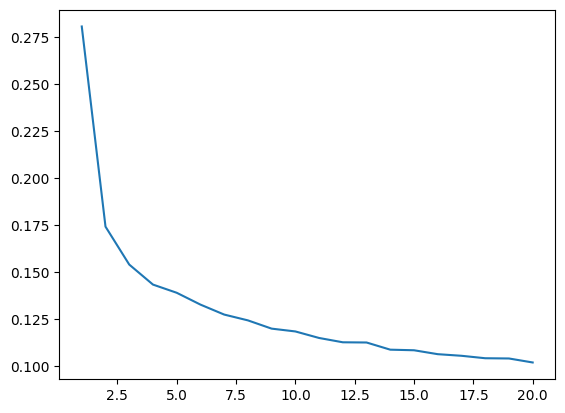

In [ ]:
sns.lineplot(x=range(1,21), y=epoch_loss)

# Test Loop

In [ ]:
model.eval()
test_loss = []

with torch.no_grad():
    all_preds = []
    all_labels = []

    for batch_X, batch_y in test_loader:
        preds = model(batch_X.to(device)).squeeze()
        loss = loss_function(preds, batch_y.to(device))   # <-- computes loss here
        test_loss.append(loss.item())

        all_preds.append(preds)
        all_labels.append(batch_y)

y_pred_tensor = torch.cat(all_preds)
y_true_tensor = torch.cat(all_labels)

In [ ]:
test_loss

[0.10182973742485046,
 0.09268689155578613,
 0.09172819554805756,
 0.1508767306804657,
 0.11133350431919098,
 0.08782078325748444,
 0.11722458899021149,
 0.08716606348752975,
 0.09751588106155396,
 0.09560063481330872,
 0.06372436881065369,
 0.09296834468841553,
 0.11615900695323944,
 0.10750877857208252,
 0.08030039072036743,
 0.07481477409601212,
 0.11738593131303787,
 0.09692893922328949,
 0.11507805436849594,
 0.11137515306472778,
 0.1275937855243683,
 0.11566048860549927,
 0.14683382213115692,
 0.09057289361953735,
 0.13035020232200623,
 0.09272239357233047,
 0.12283016741275787,
 0.11407138407230377,
 0.0844058096408844,
 0.06425373256206512,
 0.08812656253576279,
 0.10570485889911652,
 0.12199769914150238,
 0.10481687635183334,
 0.08876100182533264,
 0.06760786473751068,
 0.13046079874038696,
 0.11085422337055206,
 0.0933740884065628,
 0.09348072111606598,
 0.10581153631210327,
 0.08920346945524216,
 0.11058828979730606,
 0.11826248466968536,
 0.11140237748622894,
 0.10456722974

In [ ]:
avg_test_loss = sum(test_loss) / len(test_loss)
print(f'Avg Test Loss = {avg_test_loss:.4f}')


Avg Test Loss = 0.1005


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_class = (y_pred_tensor >= 0.5).int().cpu().numpy()
y_true = y_true_tensor.int().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_class))
print("Classification Report:\n", classification_report(y_true, y_pred_class))


Accuracy: 0.9561742219476408
Confusion Matrix:
 [[14200   445]
 [  690 10563]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14645
           1       0.96      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.95      0.96     25898
weighted avg       0.96      0.96      0.96     25898



### Trying out some tunings
- Model - 2

In [ ]:
import torch.nn as nn

class ANNBiClf1(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.layer1 = nn.Linear(n_features, 128)
    self.tanh = nn.Tanh()
    self.layer2 = nn.Linear(128, 64)
    self.relu1 = nn.ReLU()
    self.layer3 = nn.Linear(64, 32)
    self.relu2 = nn.ReLU()
    self.output = nn.Linear(32,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
      z1 = self.layer1(X)
      a1 = self.tanh(z1)

      z2 = self.layer2(a1)
      a2 = self.relu1(z2)

      z3 = self.layer3(a2)
      a3 = self.relu2(z3)

      z4 = self.output(a3)
      out = self.sigmoid(z4)

      return out



In [ ]:
model_1 = ANNBiClf1(n_features = X_train_final.shape[1]).to(device)

In [ ]:
model_1

ANNBiClf1(
  (layer1): Linear(in_features=23, out_features=128, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu1): ReLU()
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
# model weights that are initialized

for name, weights in model_1.named_parameters():
  print(name)
  print(weights.shape)
  print(f'{name} : {weights.shape}')
  print(weights)

layer1.weight
torch.Size([128, 23])
layer1.weight : torch.Size([128, 23])
Parameter containing:
tensor([[-0.1106, -0.0679, -0.0181,  ...,  0.1551, -0.0228, -0.1389],
        [-0.2081,  0.1452,  0.0368,  ...,  0.0914, -0.0273,  0.0308],
        [ 0.0579, -0.1845, -0.1722,  ..., -0.1291, -0.1658,  0.0344],
        ...,
        [-0.1933,  0.1941, -0.1612,  ..., -0.0457, -0.0933,  0.1565],
        [ 0.1739,  0.0882,  0.1276,  ...,  0.0552, -0.1411, -0.1759],
        [ 0.0412,  0.0366,  0.1550,  ...,  0.1191,  0.0928, -0.1095]],
       device='cuda:0', requires_grad=True)
layer1.bias
torch.Size([128])
layer1.bias : torch.Size([128])
Parameter containing:
tensor([ 0.1080, -0.1518, -0.0870,  0.0707,  0.0287, -0.1186, -0.0055, -0.0829,
        -0.1240, -0.1401,  0.0722,  0.1937, -0.0399, -0.0401, -0.0781,  0.1830,
         0.1474, -0.0222,  0.1574, -0.1070, -0.1678, -0.1982, -0.1966, -0.0125,
        -0.0277,  0.1480, -0.1676, -0.0182, -0.1813, -0.0311, -0.0212,  0.0329,
        -0.0859, -0.20

In [ ]:
# Loss Function & Optimizer
import torch.optim as optim

loss_function = nn.BCELoss().to(device)  # Binary Cross-Entropy
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

# This is our way of saying that apply Adam optimizer on the parameters of this model the model object that we have created
# In Gradient Descent we use the learning rate for weight updation

In [ ]:
for batch_X, batch_y in train_loader:
  print(batch_X.shape, batch_y.shape)

# train_loader is an iterable which gives a batch in every iteration when iterated using for loop

torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])


# Train Loop

In [ ]:
num_epochs = 20
epoch_loss = []

for epoch in range(num_epochs):
  model_1.train()    # set the model in train mode, when model is in train mode, then only gradients of the model are computed
  train_loss = []   #--> empty list, just to keep a track of how the loss is being for multiple batches

  for batch_X, batch_y in train_loader:
    y_pred = model_1(batch_X.to(device)).squeeze()  # Here we get Ypred/output

    # Once we have got output, we compute loss for the batch
    loss = loss_function(y_pred, batch_y.to(device))

    # Once the loss is computed, then we do the backward propagation we apply the chain rule to get all the gradients that we have
    loss.backward()

    optimizer.step()  # Weight updation using computed gradients
    # whatever the gradients gets computed, those gets stored in the optimizer

    optimizer.zero_grad()

    train_loss.append(loss.item())  # --> appending Train_loss for individual batches

  avg_train_loss = sum(train_loss) / len(train_loss)
  print(f'Avg train loss after {epoch+1} epochs = {avg_train_loss}')

  epoch_loss.append(avg_train_loss)


Avg train loss after 1 epochs = 0.23656604288168895
Avg train loss after 2 epochs = 0.1548227808357757
Avg train loss after 3 epochs = 0.13872290079332428
Avg train loss after 4 epochs = 0.1298287954411389
Avg train loss after 5 epochs = 0.12346745324263603
Avg train loss after 6 epochs = 0.11809861239873701
Avg train loss after 7 epochs = 0.11354019645095607
Avg train loss after 8 epochs = 0.10977164118286269
Avg train loss after 9 epochs = 0.10834023979159049
Avg train loss after 10 epochs = 0.10494737050231592
Avg train loss after 11 epochs = 0.10296626046391917
Avg train loss after 12 epochs = 0.10111391354168271
Avg train loss after 13 epochs = 0.09979805041242529
Avg train loss after 14 epochs = 0.09853837181020667
Avg train loss after 15 epochs = 0.09756206644262061
Avg train loss after 16 epochs = 0.09608189307475164
Avg train loss after 17 epochs = 0.09494151905822901
Avg train loss after 18 epochs = 0.09423353695483119
Avg train loss after 19 epochs = 0.09312974649860903
Avg 

<Axes: >

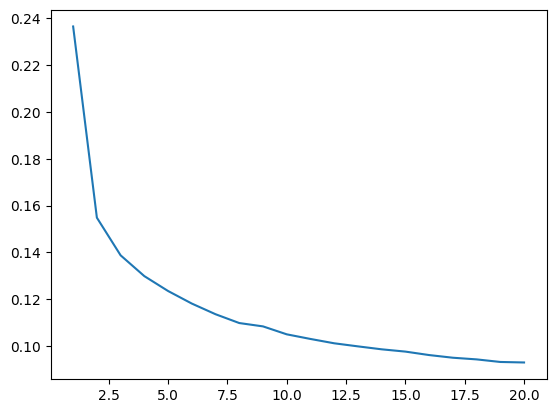

In [ ]:
sns.lineplot(x=range(1,21), y=epoch_loss)

# Test Loop

In [ ]:
model_1.eval()
test_loss = []

with torch.no_grad():
    all_preds = []
    all_labels = []

    for batch_X, batch_y in test_loader:
        preds = model_1(batch_X.to(device)).squeeze()
        loss = loss_function(preds, batch_y.to(device))   # <-- computes loss here
        test_loss.append(loss.item())

        all_preds.append(preds)
        all_labels.append(batch_y)

y_pred_tensor = torch.cat(all_preds)
y_true_tensor = torch.cat(all_labels)

In [ ]:
test_loss

[0.11319489032030106,
 0.08051334321498871,
 0.10200227797031403,
 0.09409916400909424,
 0.10317876189947128,
 0.09558765590190887,
 0.10096155107021332,
 0.08825507014989853,
 0.07891751825809479,
 0.08884186297655106,
 0.10026387870311737,
 0.08923495560884476,
 0.08938132226467133,
 0.08199723064899445,
 0.06175295263528824,
 0.12622061371803284,
 0.11431688815355301,
 0.11611954867839813,
 0.08436765521764755,
 0.11683008074760437,
 0.10684932768344879,
 0.07930903881788254,
 0.07756946235895157,
 0.15152627229690552,
 0.08525867760181427,
 0.06629853695631027,
 0.09786278009414673,
 0.07296355068683624,
 0.08149861544370651,
 0.07539229094982147,
 0.11129827797412872,
 0.07062356919050217,
 0.07624740153551102,
 0.056109074503183365,
 0.08307361602783203,
 0.06897684931755066,
 0.0796201080083847,
 0.09090776741504669,
 0.0779765248298645,
 0.08595658838748932,
 0.10057992488145828,
 0.07006719708442688,
 0.09742674231529236,
 0.09444770216941833,
 0.046520497649908066,
 0.0710916

In [ ]:
avg_test_loss = sum(test_loss) / len(test_loss)
print(f'Avg Test Loss = {avg_test_loss:.4f}')

Avg Test Loss = 0.0920


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_class = (y_pred_tensor >= 0.5).int().cpu().numpy()
y_true = y_true_tensor.int().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_class))
print("Classification Report:\n", classification_report(y_true, y_pred_class))

Accuracy: 0.9601899760599274
Confusion Matrix:
 [[14255   390]
 [  641 10612]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     14645
           1       0.96      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [ ]:
torch.save(model_1.state_dict(), 'ann_model2.pth')

- Model - 3

In [ ]:
import torch.nn as nn

class ANNBiClf2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.layer1 = nn.Linear(n_features, 128)
    self.tanh = nn.Tanh()
    self.layer2 = nn.Linear(128, 64)
    self.relu1 = nn.ReLU()
    self.layer3 = nn.Linear(64, 32)
    self.relu2 = nn.ReLU()
    self.output = nn.Linear(32,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
      z1 = self.layer1(X)
      a1 = self.tanh(z1)

      z2 = self.layer2(a1)
      a2 = self.relu1(z2)

      z3 = self.layer3(a2)
      a3 = self.relu2(z3)

      z4 = self.output(a3)
      out = self.sigmoid(z4)

      return out

In [ ]:
model_2 = ANNBiClf2(n_features = X_train_final.shape[1]).to(device)

In [ ]:
model_2

ANNBiClf2(
  (layer1): Linear(in_features=23, out_features=128, bias=True)
  (tanh): Tanh()
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (relu1): ReLU()
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [ ]:
# model weights that are initialized

for name, weights in model_2.named_parameters():
  print(name)
  print(weights.shape)
  print(f'{name} : {weights.shape}')
  print(weights)

layer1.weight
torch.Size([128, 23])
layer1.weight : torch.Size([128, 23])
Parameter containing:
tensor([[ 0.0260, -0.1341, -0.1912,  ...,  0.1935, -0.1207,  0.0805],
        [ 0.0320,  0.0143, -0.1766,  ..., -0.1201, -0.1678,  0.1654],
        [ 0.0013, -0.1906, -0.0809,  ...,  0.1554,  0.1004, -0.2048],
        ...,
        [-0.0778, -0.1573, -0.1966,  ..., -0.1809,  0.0971, -0.1183],
        [-0.0202,  0.0749, -0.1275,  ...,  0.0720, -0.1536,  0.0791],
        [ 0.0805, -0.1846,  0.1529,  ..., -0.1554, -0.1565,  0.1855]],
       device='cuda:0', requires_grad=True)
layer1.bias
torch.Size([128])
layer1.bias : torch.Size([128])
Parameter containing:
tensor([-0.0266, -0.0870, -0.1301,  0.0833, -0.1290,  0.1975,  0.0276, -0.0468,
         0.2009,  0.1763, -0.1621,  0.0555,  0.0121,  0.2033, -0.1864,  0.1032,
         0.1587, -0.0607,  0.0122, -0.1960,  0.1928,  0.0574,  0.0753,  0.0991,
         0.0386,  0.0065, -0.0992, -0.0933, -0.0579,  0.0521,  0.1971,  0.0441,
        -0.0891,  0.06

In [ ]:
# Loss Function & Optimizer
import torch.optim as optim

loss_function = nn.BCELoss().to(device)  # Binary Cross-Entropy
optimizer = optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)

# This is our way of saying that apply Adam optimizer on the parameters of this model the model object that we have created
# In Gradient Descent we use the learning rate for weight updation


In [ ]:

for batch_X, batch_y in train_loader:
  print(batch_X.shape, batch_y.shape)

# train_loader is an iterable which gives a batch in every iteration when iterated using for loop

torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])
torch.Size([128, 23]) torch.Size([128])


# Train Loop

In [ ]:
num_epochs = 20
epoch_loss = []

for epoch in range(num_epochs):
  model_2.train()    # set the model in train mode, when model is in train mode, then only gradients of the model are computed
  train_loss = []   #--> empty list, just to keep a track of how the loss is being for multiple batches

  for batch_X, batch_y in train_loader:
    y_pred = model_2(batch_X.to(device)).squeeze()  # Here we get Ypred/output

    # Once we have got output, we compute loss for the batch
    loss = loss_function(y_pred, batch_y.to(device))

    # Once the loss is computed, then we do the backward propagation we apply the chain rule to get all the gradients that we have
    loss.backward()

    optimizer.step()  # Weight updation using computed gradients
    # whatever the gradients gets computed, those gets stored in the optimizer

    optimizer.zero_grad()

    train_loss.append(loss.item())  # --> appending Train_loss for individual batches

  avg_train_loss = sum(train_loss) / len(train_loss)
  print(f'Avg train loss after {epoch+1} epochs = {avg_train_loss}')

  epoch_loss.append(avg_train_loss)

Avg train loss after 1 epochs = 0.31391564545072154
Avg train loss after 2 epochs = 0.1787182828158508
Avg train loss after 3 epochs = 0.16371924853711217
Avg train loss after 4 epochs = 0.15027314511898124
Avg train loss after 5 epochs = 0.14715758941515727
Avg train loss after 6 epochs = 0.13766929016988955
Avg train loss after 7 epochs = 0.1300334762505911
Avg train loss after 8 epochs = 0.1308062868077814
Avg train loss after 9 epochs = 0.12594588495974923
Avg train loss after 10 epochs = 0.121637277558078
Avg train loss after 11 epochs = 0.12237873115105394
Avg train loss after 12 epochs = 0.11741385448862005
Avg train loss after 13 epochs = 0.11650305932134758
Avg train loss after 14 epochs = 0.11498527357607712
Avg train loss after 15 epochs = 0.11196178482546483
Avg train loss after 16 epochs = 0.1119889301834283
Avg train loss after 17 epochs = 0.10950721696157147
Avg train loss after 18 epochs = 0.10917765536334044
Avg train loss after 19 epochs = 0.10804751160106173
Avg trai

<Axes: >

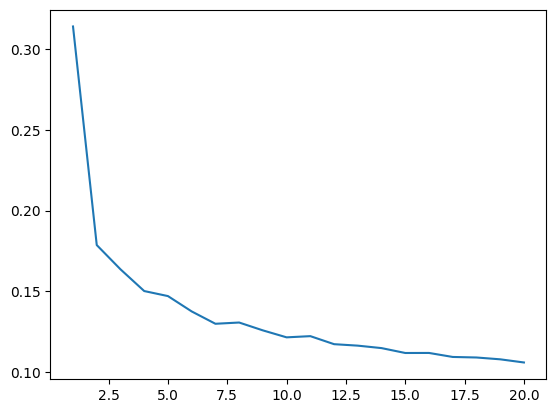

In [ ]:
sns.lineplot(x=range(1,21), y=epoch_loss)

| Aspect           | Observation           | Verdict                                                  |
| ---------------- | --------------------- | -------------------------------------------------------- |
| Convergence      | Slower than Adam      | Expected — SGD needs more time                           |
| Stability        | Very good             | Momentum helps here                                      |
| Final loss       | Slightly higher       | But might generalize better (we’ll confirm with metrics) |
| Learning pattern | Textbook SGD behavior | Clean and reliable                                       |


# Test Loop

In [ ]:
model_2.eval()
test_loss = []

with torch.no_grad():
    all_preds = []
    all_labels = []

    for batch_X, batch_y in test_loader:
        preds = model_2(batch_X.to(device)).squeeze()
        loss = loss_function(preds, batch_y.to(device))   # <-- computes loss here
        test_loss.append(loss.item())

        all_preds.append(preds)
        all_labels.append(batch_y)

y_pred_tensor = torch.cat(all_preds)
y_true_tensor = torch.cat(all_labels)

In [ ]:
test_loss

[0.11485333740711212,
 0.07609373331069946,
 0.06029307842254639,
 0.11524133384227753,
 0.1236412525177002,
 0.11316289007663727,
 0.10811980068683624,
 0.1208418756723404,
 0.13624638319015503,
 0.07066230475902557,
 0.1079525426030159,
 0.09523043036460876,
 0.11016230285167694,
 0.08684241771697998,
 0.09680728614330292,
 0.09890337288379669,
 0.12786942720413208,
 0.10811077058315277,
 0.09448887407779694,
 0.09333613514900208,
 0.09287335723638535,
 0.11132803559303284,
 0.1059991717338562,
 0.08850200474262238,
 0.10023754835128784,
 0.0983642116189003,
 0.1426457166671753,
 0.0774819403886795,
 0.10551145672798157,
 0.07966983318328857,
 0.12378574907779694,
 0.11247354745864868,
 0.09134657680988312,
 0.10389553010463715,
 0.11403072625398636,
 0.1487598419189453,
 0.10492214560508728,
 0.1490107774734497,
 0.130233496427536,
 0.11427730321884155,
 0.13497930765151978,
 0.11113055050373077,
 0.10005123168230057,
 0.09466435015201569,
 0.11553774029016495,
 0.12367811053991318,

In [ ]:
avg_test_loss = sum(test_loss) / len(test_loss)
print(f'Avg Test Loss = {avg_test_loss:.4f}')

Avg Test Loss = 0.1086


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_class = (y_pred_tensor >= 0.5).int().cpu().numpy()
y_true = y_true_tensor.int().numpy()

print("Accuracy:", accuracy_score(y_true, y_pred_class))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred_class))
print("Classification Report:\n", classification_report(y_true, y_pred_class))

Accuracy: 0.9521584678353541
Confusion Matrix:
 [[13975   670]
 [  569 10684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     14645
           1       0.94      0.95      0.95     11253

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



| Model       | Architecture / Activations                                   | Optimizer                   | Accuracy     | FN (1 missed) | FP (0 wrongly flagged) | Verdict                                 |
| ----------- | ------------------------------------------------------------ | --------------------------- | ------------ | ------------- | ---------------------- | --------------------------------------- |
| **Model A** | ReLU → ReLU → Sigmoid<br>(23 → 64 → 32 → 1)                  | Adam (default)              | 95.62%       | **690**       | 445                    | Balanced baseline                       |
| **Model B** | **Tanh → ReLU → ReLU → Sigmoid**<br>(23 → 128 → 64 → 32 → 1) | Adam (lr=0.001)             | **96.05%** ✅ | 634           | **389** ✅              | Best overall accuracy & balance         |
| **Model C** | Same as Model B                                              | SGD (lr=0.01, momentum=0.9) | 95.22%       | **569** ✅     | 670 ❌                  | Best recall, but higher false positives |



| **Business Goal**                                                            | **Recommended Model**              |
| ---------------------------------------------------------------------------- | ---------------------------------- |
| Maximize correct identification of dissatisfied passengers (**High Recall**) | Model 1 (ReLU, shallower)          |
| Maximize overall accuracy & minimize false positives (**High Precision**)    | **Model 2 (Tanh + ReLU + Adam)** ✅ |
| Conservative predictions, stable but slower convergence                      | Model 3 (SGD Optimizer, lr=0.01)   |

